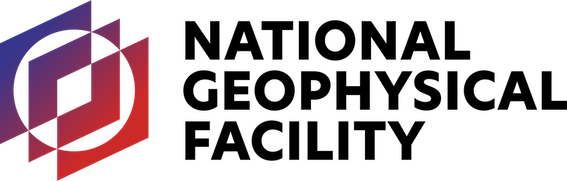
<!-- Image is embeded in this Markdown cell -->
<div style="display:flex; align-items:center; justify-content:space-between; gap:1rem;">
  <img src="attachment:NGF-Logo-FullName-RGB-Color.jpeg" style="max-height:120px;">
  <div style="text-align:right; line-height:1.25;">
    <p style="margin:0;">This module developed by David Mencin and the GeoLab Team: Alex Hamilton, Sophia Parafina, Sarah Wilson and Chad Trabant</p>
    <p style="margin:0;"><em>© 2025 EarthScope Consortium, NGF is operated on behalf of the NSF by EarthScope</em></p>
  </div>
</div>


# GNSS Geometry and Specular Reflection Point

In this notebook, we derive and visualize the **specular reflection point** — the location on the surface where a GNSS signal reflects toward the antenna.
This builds on the two-ray model developed in the first notebook.



**Objectives:**
- Derive coordinates of the specular reflection point.
- Explore how it moves with satellite elevation and azimuth.
- Visualize the geometry in 2D and 3D.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



## Derivation of Specular Reflection Geometry

Let the antenna be at position $\mathbf{R}_A = (0, 0, h)$, and the ground plane be $z = 0_z = 0$.  
A GNSS satellite at elevation $E$ and azimuth $A$ defines a direction unit vector:

$$
\hat{\mathbf{s}} =
\begin{bmatrix}
\cos E \sin A \\[4pt]
\cos E \cos A \\[4pt]
\sin E
\end{bmatrix}
$$

By the **image method**, the reflection point $\mathbf{P}$ is found where the ray from the image antenna (at depth $h$ below ground) intersects the ground plane.
Under the plane-wave (far-field) approximation:

$$
r = h \cot E,
$$

where $r$ is the horizontal offset between the antenna and reflection point.

Hence, in local coordinates:

$$
\boxed{
\mathbf{P} = (r \sin A,\; r \cos A,\; 0)
}
$$


In [2]:

# Parameters
h = 2.0          # antenna height (m)
E_deg = 15.0     # elevation angle (deg)
A_deg = 45.0     # azimuth (deg)
E = np.deg2rad(E_deg)
A = np.deg2rad(A_deg)

r = h / np.tan(E)
xP, yP = r * np.sin(A), r * np.cos(A)
r, (xP, yP)


(7.464101615137755, (5.277916867529369, 5.277916867529369))


## 2D Vertical Plane Geometry
We'll first visualize the cross-section in the plane of incidence.


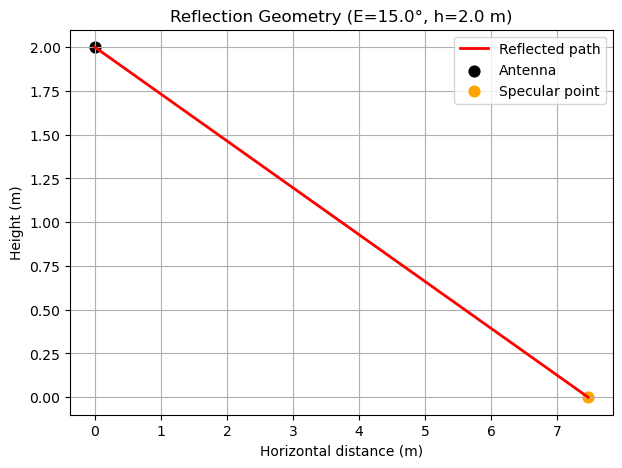

In [3]:

plt.figure(figsize=(7,5))
plt.plot([0, r], [h, 0], 'r-', lw=2, label='Reflected path')
plt.scatter(0, h, color='k', s=60, label='Antenna')
plt.scatter(r, 0, color='orange', s=60, label='Specular point')
plt.xlabel('Horizontal distance (m)')
plt.ylabel('Height (m)')
plt.title(f'Reflection Geometry (E={E_deg}°, h={h} m)')
plt.legend()
plt.grid(True)
plt.show()



## 3D Geometry Visualization
Now include azimuth to show the ground projection of the reflection point.


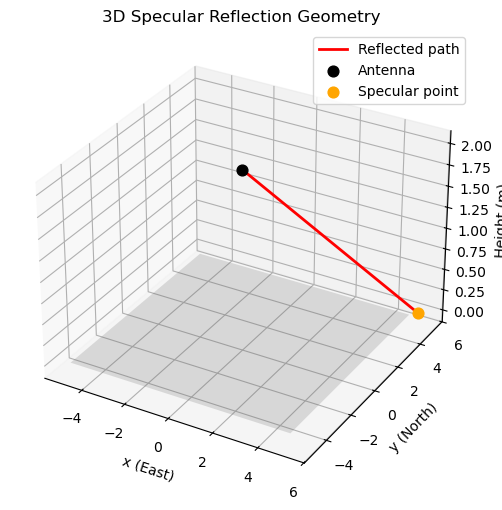

In [4]:

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

# Ground plane
xx, yy = np.meshgrid(np.linspace(-5,5,2), np.linspace(-5,5,2))
zz = np.zeros_like(xx)
ax.plot_surface(xx, yy, zz, alpha=0.2, color='gray')

# Antenna and specular point
ax.plot([0, xP], [0, yP], [h, 0], 'r-', lw=2, label='Reflected path')
ax.scatter(0, 0, h, color='k', s=60, label='Antenna')
ax.scatter(xP, yP, 0, color='orange', s=60, label='Specular point')

ax.set_xlabel('x (East)')
ax.set_ylabel('y (North)')
ax.set_zlabel('Height (m)')
ax.set_title('3D Specular Reflection Geometry')
ax.legend()
plt.show()



## Specular Point Motion with Elevation Angle
As the satellite rises, \(E\) increases and the reflection footprint moves toward the antenna.


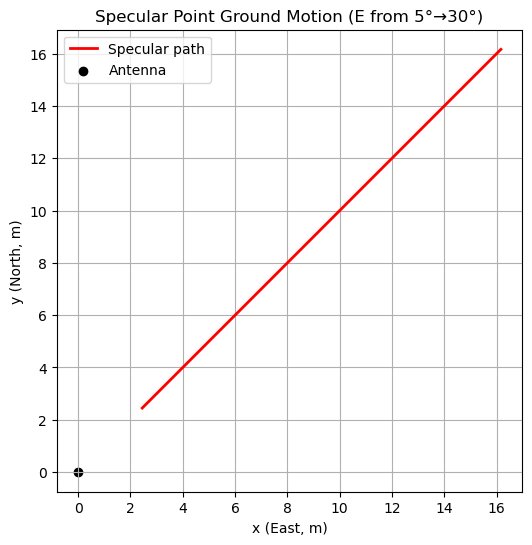

In [5]:

E_deg_series = np.linspace(5, 30, 60)
r_series = h / np.tan(np.deg2rad(E_deg_series))
x_series = r_series * np.sin(A)
y_series = r_series * np.cos(A)

plt.figure(figsize=(6,6))
plt.plot(x_series, y_series, 'r-', lw=2, label='Specular path')
plt.scatter(0, 0, color='k', label='Antenna')
plt.xlabel('x (East, m)')
plt.ylabel('y (North, m)')
plt.axis('equal')
plt.title('Specular Point Ground Motion (E from 5°→30°)')
plt.legend()
plt.grid(True)
plt.show()



## Summary

- The specular point is where incident and reflected rays obey Snell's law.  
- For a flat reflector and far-field satellite, the horizontal offset is $r = h \cot E$.  
- As $E$ increases, $r$ decreases — the reflection footprint moves closer to the antenna.  
- The azimuth $A$ defines the ground direction of the reflection point.  
- This geometry underpins **Fresnel zone** and **sensitivity** analyses in GNSS-IR.



## Next Notebook
**`03_Fresnel_Zones_and_Sensitivity.ipynb`** — Next, we’ll compute Fresnel zone radii and examine the spatial footprint of the GNSS-IR reflection.
